In [8]:
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import MatplotlibDeprecationWarning

sys.path.append("..")

from create_metrics import join_wrapper
from utils import config
from utils.pandas_style import highlight_col
from utils.plots import init_plot_params
from utils.seeds import (
    add_col_resumen,
    add_perc,
    barplot_from_metrics_seeds,
    casos_comun_beto_roberta,
    det_cols,
    det_cols_res,
    det_cols_tex,
    get_analysis_dfs,
    get_det_test,
    get_no_cont_counts,
    get_st_test,
    paper_names,
    st_cols,
    st_cols_res,
    st_cols_tex,
    tabla_resumen,
)

st_test = get_st_test()
det_test = get_det_test()

warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
init_plot_params(**{"figure.dpi": 70})
init_plot_params(**{"savefig.dpi": 200})

pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
data = "stereohoax"
df = pd.read_csv(
    os.path.join(config.BASE_DIR, "results/metrics", f"metrics_{data}-task1.csv"),
)
# df

In [10]:
df = join_wrapper(
    "../results/stereohoax/fine_tuning_512/stereohoax-roberta_bne-5_concat_contexts_hard_s65_max_tokens_512-task1.csv",
    "stereohoax",
)
# compute_metrics1(df)

# Average plots

In [11]:
MODELS = ("beto", "roberta_bne", "mbert")

In [12]:
data = "stereohoax"
conf = config.get_conf(data)
barplot_from_metrics_seeds(
    data,
    models=MODELS,
    quartiles=True,
    ttest=True,
    metrics=[
        "f1_neg",
        "precision_neg",
        "recall_neg",
        "f1_pos",
        "precision_pos",
        "recall_pos",
    ],
    save="stereohoax_0",
)

<Figure size 1050x560 with 0 Axes>

In [ ]:
data = "stereohoax"
conf = config.get_conf(data)
barplot_from_metrics_seeds(
    data,
    models=MODELS,
    quartiles=True,
    ttest=True,
    metrics=[
        "accuracy_explicit",
        "accuracy_implicit",
        "accuracy_no_contextual",
        "accuracy_contextual",
    ],
    # save=True,
)

In [ ]:
data = "stereohoax"
conf = config.get_conf(data)
barplot_from_metrics_seeds(
    data,
    models=MODELS,
    quartiles=True,
    ttest=True,
    metrics=[
        "softmax_confidence",
        "TP_softmax_confidence",
        "FP_softmax_confidence",
        "FN_softmax_confidence",
        "TN_softmax_confidence",
    ],
    # save=True,
)

In [13]:
data = "detests"
conf = config.get_conf(data)
barplot_from_metrics_seeds(
    data,
    models=MODELS,
    quartiles=True,
    ttest=True,
    metrics=[
        "f1_neg",
        "precision_neg",
        "recall_neg",
        "f1_pos",
        "precision_pos",
        "recall_pos",
    ],
    save="detests_0",
)

<Figure size 1050x560 with 0 Axes>

In [ ]:
data = "detests"
conf = config.get_conf(data)
barplot_from_metrics_seeds(
    data,
    models=MODELS,
    quartiles=True,
    ttest=True,
    metrics=[
        "softmax_confidence",
        "TP_softmax_confidence",
        "FP_softmax_confidence",
        "FN_softmax_confidence",
        "TN_softmax_confidence",
    ],
    # save=True,
)

# Average results

In [4]:
THRESHOLD = 0.35
FOLDER = "fine_tuning_512"
N_SEEDS = 50
# MODELS = ("beto", "roberta_bne")
MODELS = ("beto", "roberta_bne", "mbert")

## stereohoax

In [5]:
data = "stereohoax"
conf = config.get_conf(data)
analysis_st = get_analysis_dfs(data, st_test, st_cols, thres=THRESHOLD, folder=FOLDER, n_seeds=N_SEEDS, models=MODELS)
no_cont_counts_st, divide_by_st = get_no_cont_counts(
    data, folder=FOLDER, thres=THRESHOLD, n_seeds=N_SEEDS, models=MODELS
)
resumen_st = tabla_resumen(analysis_st, data, models=MODELS)
resumen_st = add_perc(resumen_st, divide_by_st, conf)

for i, df in enumerate(analysis_st):
    for cont in conf.contexts_results[1:-1]:
        _df = df.groupby(cont)[["implicit", "contextual"]].sum()
        if not _df[_df.index.str.contains("empeora")].empty:
            resumen_st.loc[2 * i, [cont[0] + " implicit", cont[0] + " contextual"]] = _df[
                _df.index.str.contains("empeora")
            ].to_numpy()
        if not _df[_df.index.str.contains("mejora")].empty:
            resumen_st.loc[2 * i + 1, [cont[0] + " implicit", cont[0] + " contextual"]] = _df[
                _df.index.str.contains("mejora")
            ].to_numpy()

    add_col_resumen(df, i, resumen_st, "2_txt_father", "stereo_father")
    add_col_resumen(df, i, resumen_st, "3_txt_head", "stereo_head")

df = resumen_st[st_cols_res].pipe(paper_names).sort_values(by="model").fillna(0).convert_dtypes()
df[st_cols_tex].rename(columns=config.contexts_dict).to_latex(
    f"../results/latex_tables/resumen_{data}.tex", index=False, escape="\\"
)
df.style.apply(highlight_col, axis=None, subset=conf.contexts_results[1:-1])

,model,index,2_txt_father,2 %,2 implicit,2 contextual,stereo_father,3_txt_head,3 %,3 implicit,3 contextual,stereo_head,4_rh_text,4 %,4 implicit,4 contextual,total
0,BETO,FP,12,(8% ↓),0,0,0,0,,0,0,0,0,,0,0,142
1,BETO,TN,28,(5% ↑),0,0,11,34,(6% ↑),0,0,15,55,(9% ↑),0,0,609
6,BETO,FN,29,(50% ↓),4,8,19,51,(88% ↓),9,12,34,113,(195% ↓),11,19,58
7,BETO,TP,2,(1% ↑),1,0,1,1,(1% ↑),1,0,0,0,,0,0,148
4,M-BERT,FP,0,,0,0,0,0,,0,0,0,0,,0,0,80
5,M-BERT,TN,24,(5% ↑),0,0,11,34,(7% ↑),0,0,14,39,(8% ↑),0,0,517
10,M-BERT,FN,30,(27% ↓),7,9,15,22,(20% ↓),2,4,19,28,(25% ↓),0,0,112
11,M-BERT,TN,0,,0,0,0,0,,0,0,0,0,,0,0,227
2,MarIA,FP,1,(1% ↓),0,0,0,1,(1% ↓),0,0,1,0,,0,0,83
3,MarIA,TN,11,(2% ↑),0,0,4,18,(3% ↑),0,0,5,23,(4% ↑),0,0,566


In [6]:
df[["model"] + st_cols_tex].style.apply(highlight_col, axis=None, subset=conf.contexts_results[1:-1])

,model,index,2_txt_father,2 %,3_txt_head,3 %,4_rh_text,4 %,total
0,BETO,FP,12,(8% ↓),0,,0,,142
1,BETO,TN,28,(5% ↑),34,(6% ↑),55,(9% ↑),609
6,BETO,FN,29,(50% ↓),51,(88% ↓),113,(195% ↓),58
7,BETO,TP,2,(1% ↑),1,(1% ↑),0,,148
4,M-BERT,FP,0,,0,,0,,80
5,M-BERT,TN,24,(5% ↑),34,(7% ↑),39,(8% ↑),517
10,M-BERT,FN,30,(27% ↓),22,(20% ↓),28,(25% ↓),112
11,M-BERT,TN,0,,0,,0,,227
2,MarIA,FP,1,(1% ↓),1,(1% ↓),0,,83
3,MarIA,TN,11,(2% ↑),18,(3% ↑),23,(4% ↑),566


In [7]:
casos_comun_beto_roberta(data, analysis_st, MODELS)

2_txt_father, negative class: {5700, 4334, 5711, 4313, 4127}
2_txt_father, positive class: {7417, 4292}
3_txt_head, negative class: {4334, 5711, 4241, 5782, 4313, 5694, 4127}
3_txt_head, positive class: {7321, 4278, 5134}
4_rh_text, negative class: {5761, 7743, 4270, 5711, 4334, 4241, 8246, 4182, 4313, 7739, 4127}
4_rh_text, positive class: {4292, 7720, 4109, 5134, 7343, 7348, 7445, 4278, 7321, 4124, 4125, 4126, 5151}
5_concat_contexts, negative class: {5700, 4334, 5711, 5205, 4182, 4313}
5_concat_contexts, positive class: {7720, 7713, 7321}


### Convergence seeds

In [8]:
resumenes = []
for n_seeds in range(10, 60, 10):
    analysis_st = get_analysis_dfs(data, st_test, st_cols, thres=THRESHOLD, folder=FOLDER, n_seeds=n_seeds)
    resumen = tabla_resumen(analysis_st, data)
    resumenes.append(resumen)

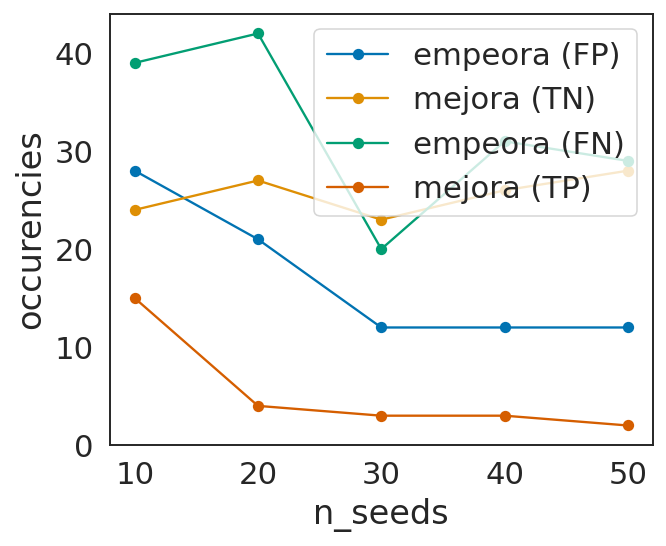

In [9]:
model = "roberta_bne"
model = "beto"
context = "2_txt_father"
res = [resumen.query("model == @model and stereo == 0").set_index("index")[context] for resumen in resumenes]
labels = res[0].keys()
res = np.array(res)

plt.plot(range(10, 60, 10), res, "o-", label=labels)
plt.xlabel("n_seeds")
plt.ylabel("occurencies")
plt.legend()

In [10]:
df = analysis_st[0]
mej_emp = "empeora"
display(df[df["2_txt_father"].str.contains(mej_emp)]["stereo_father"].value_counts())
display(df[df["3_txt_head"].str.contains(mej_emp)]["stereo_father"].value_counts())

stereo_father
0.0    12
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

In [11]:
df = analysis_st[0]
cont = "4_rh_text"
cont_id = "rh_id"
mask = df[cont] == "mejora"
mask = df[cont] == "empeora"
mask = df[cont] != ""
df[mask].groupby(cont_id)[cont].value_counts()

rh_id  4_rh_text  
SP008  mejora (TN)     3
SP010  mejora (TN)     2
SP014  mejora (TN)     2
SP015  mejora (TN)     2
SP020  mejora (TN)     2
SP023  mejora (TN)     3
SP027  mejora (TN)    18
SP040  mejora (TN)     8
SP047  mejora (TN)    12
SP049  mejora (TN)     3
Name: count, dtype: int64

In [12]:
st_test.groupby(cont_id)["stereo"].value_counts()

rh_id  stereo
SP008  1          39
       0          31
SP009  0          19
       1           8
SP010  0           6
       1           4
SP014  0          48
       1          28
SP015  1         123
       0          76
SP020  0          50
       1          41
SP023  0          15
       1           3
SP027  0         248
       1          26
SP031  0          10
       1           3
SP040  0          21
       1          21
SP047  0         135
       1          49
SP049  0          52
       1           3
SP057  1          10
       0           3
Name: count, dtype: int64

## detests

In [13]:
data = "detests"
conf = config.get_conf(data)
analysis_det = get_analysis_dfs(
    data, det_test, det_cols, thres=THRESHOLD, folder=FOLDER, n_seeds=N_SEEDS, models=MODELS
)
no_cont_counts_det, divide_by_det = get_no_cont_counts(
    data, folder=FOLDER, thres=THRESHOLD, n_seeds=N_SEEDS, models=MODELS
)
resumen_det = tabla_resumen(analysis_det, data, models=MODELS)
resumen_det = add_perc(resumen_det, divide_by_det, conf)

for i, df in enumerate(analysis_det):
    for cont in conf.contexts_results[1:-1]:
        _df = df.groupby(cont)["implicit"].sum()
        if not _df[_df.index.str.contains("empeora")].empty:
            resumen_det.loc[2 * i, cont[0] + " implicit"] = _df[_df.index.str.contains("empeora")].to_numpy()
        if not _df[_df.index.str.contains("mejora")].empty:
            resumen_det.loc[2 * i + 1, cont[0] + " implicit"] = _df[_df.index.str.contains("mejora")].to_numpy()
    # add_col_resumen(analysis_det, resumen_det, "2_previous_comment", "stereotype_previous_comment")
    # add_col_resumen(analysis_det, resumen_det, "3_first_comment", "stereo_first_comment")

df = resumen_det[det_cols_res].pipe(paper_names).sort_values(by="model").fillna(0).convert_dtypes()
df[det_cols_tex].rename(columns=config.contexts_dict).to_latex(
    f"../results/latex_tables/resumen_{data}.tex", index=False, escape="\\"
)
df.style.apply(highlight_col, axis=None, subset=conf.contexts_results[1:-1])

,index,data,model,stereo,1_previous_sentences,1 %,1 implicit,2_previous_comment,2 %,2 implicit,3_first_comment,3 %,3 implicit,4_news_title,4 %,4 implicit,total
0,FP,detests,BETO,0,40,(25% ↓),0,50,(31% ↓),0,37,(23% ↓),0,4,(2% ↓),0,163
1,TN,detests,BETO,0,0,,0,1,(0% ↑),0,2,(0% ↑),0,3,(0% ↑),0,1173
6,FN,detests,BETO,0,0,,0,1,(1% ↓),1,3,(3% ↓),3,3,(3% ↓),2,112
7,TP,detests,BETO,0,16,(5% ↑),13,19,(7% ↑),13,14,(5% ↑),9,2,(1% ↑),2,292
4,FP,detests,M-BERT,0,6,(3% ↓),0,1,(1% ↓),0,0,,0,3,(2% ↓),0,198
5,TN,detests,M-BERT,0,0,,0,0,,0,2,(0% ↑),0,0,,0,1167
10,FN,detests,M-BERT,0,1,(1% ↓),1,1,(1% ↓),1,11,(13% ↓),7,0,,0,86
11,TP,detests,M-BERT,0,3,(1% ↑),3,0,,0,0,,0,1,(0% ↑),1,223
2,FP,detests,MarIA,0,11,(7% ↓),0,7,(4% ↓),0,7,(4% ↓),0,41,(24% ↓),0,169
3,TN,detests,MarIA,0,12,(1% ↑),0,14,(1% ↑),0,16,(1% ↑),0,1,(0% ↑),0,1187


In [14]:
casos_comun_beto_roberta(data, analysis_det, MODELS)

1_previous_sentences, negative class: {(616, 2), (706, 1), (671, 2), (349, 3)}
1_previous_sentences, positive class: set()
2_previous_comment, negative class: {(164, 5), (774, 7), (524, 1)}
2_previous_comment, positive class: set()
3_first_comment, negative class: {(471, 3), (608, 1)}
3_first_comment, positive class: set()
4_news_title, negative class: {(671, 2)}
4_news_title, positive class: set()
5_concat_contexts, negative class: {(164, 5), (774, 7), (0, 2), (755, 2), (710, 1), (349, 3), (616, 2), (671, 2)}
5_concat_contexts, positive class: {(659, 3), (801, 2), (83, 2), (318, 11)}


In [15]:
df = analysis_det[2]
cont = "4_news_title"
cont_id = "file_id"
df[df[cont] != ""].groupby(cont_id)[cont].value_counts()

file_id     4_news_title
AD20200719  empeora (FP)    1
EM20210519  empeora (FP)    1
EM20211106  empeora (FP)    1
Name: count, dtype: int64

In [16]:
det_test.groupby(cont_id)["stereotype"].value_counts()

file_id      stereotype
ABC20211105  0             313
             1             113
AD20200719   0             148
             1              48
EC20210829   0             101
             1              53
EM20210519   0             337
             1             100
EM20211106   0             425
             1             174
Name: count, dtype: int64